## Filter out movies with too few ratings

In [2]:
import pandas as pd
import glob
%matplotlib inline

### Concat to 1 df

In [2]:
df_rating = []
for file in glob.glob("crawl-ratings/*00.csv"):
    df_rating.append(pd.read_csv(file))

In [3]:
df_rating = pd.concat(df_rating)

In [4]:
df_rating

UserID    MovieID  Rating 
0       ur66355076  tt3501632        7
1       ur66355076  tt5776858        8
2       ur66355076  tt2543164        9
3       ur66355076  tt1856101        8
4       ur66355076  tt1825683        9
...            ...        ...      ...
182881   ur3032357  tt0120685        4
182882   ur3032357  tt0145681        7
182883   ur3032357  tt0075148        9
182884   ur3032357  tt0088763        8
182885   ur3032357  tt0082198        8

[1626980 rows x 3 columns]

In [5]:
movie_stat = df_rating['MovieID'].value_counts()

### Some stats

In [6]:
print(movie_stat.sum())
print(movie_stat[movie_stat>=5].sum())
print(movie_stat[movie_stat<5].sum())

1626980
1464738
162242


In [101]:
print(movie_stat.sum())
print(movie_stat[movie_stat>=50].sum())
print(movie_stat[movie_stat<10].sum())

1626980
1022534
265728


In [102]:
print(movie_stat.value_counts()[4:9].sum())
print(movie_stat.value_counts()[9:].sum())
print(movie_stat.value_counts()[50:].sum())
print(movie_stat.value_counts().sum())

15844
22874
6369
137775


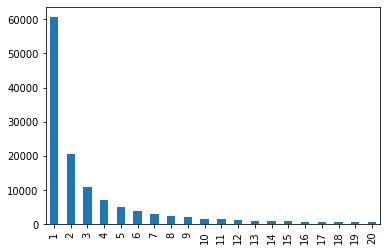

In [9]:
movie_stat.value_counts()[:20].plot.bar()

### Filter with threshold

In [10]:
threshold=5

In [11]:
df_rating_filtered = df_rating[df_rating.MovieID.isin(movie_stat[movie_stat>=threshold].index)]

In [12]:
df_rating_filtered['MovieID'].value_counts()

tt0096697    5929
tt0944947    3676
tt0108778    3239
tt0052520    2891
tt0903747    2409
             ... 
tt0439707       5
tt0079803       5
tt0387887       5
tt7853068       5
tt0037662       5
Name: MovieID, Length: 38718, dtype: int64

In [114]:
df_rating_filtered['UserID'].value_counts()[-15:]

ur103317327    103
ur61423863     102
ur32915980     101
ur49236468     101
ur5411269      100
ur82903451      99
ur22999317      99
ur62942093      99
ur106224983     94
ur40049808      93
ur46768703      91
ur108071848     86
ur94875269      85
ur14330747      61
ur92127176      59
Name: UserID, dtype: int64

In [17]:
df_rating_filtered.to_csv('crawl-ratings/rating-filtered.csv', index=False)

In [108]:
# Other threshold
threshold=30

In [109]:
df_rating_filtered_50 = df_rating[df_rating.MovieID.isin(movie_stat[movie_stat>=threshold].index)]

In [110]:
df_rating_filtered_50['MovieID'].value_counts()

tt0096697    5929
tt0944947    3676
tt0108778    3239
tt0052520    2891
tt0903747    2409
             ... 
tt5316540      30
tt0062861      30
tt2203308      30
tt0037615      30
tt5278426      30
Name: MovieID, Length: 9748, dtype: int64

In [111]:
df_rating_filtered_50['UserID'].value_counts()

ur19009969    15934
ur3032357     15158
ur34575093     9429
ur23172671     9350
ur28967391     9329
              ...  
ur13588546       49
ur11983563       46
ur92127176       40
ur53825238       30
ur14330747       25
Name: UserID, Length: 1105, dtype: int64

## Split train-test

In [2]:
df = pd.read_csv('crawl-ratings/rating-filtered.csv')

In [6]:
user_list = df.UserID.unique()

In [10]:
train_list=[]
test_list=[]
test_rating_per_user=20
for user in user_list:
    user_rating = df[df.UserID == user]
    user_test = user_rating.sample(n=test_rating_per_user,random_state=0)
    test_list.append(user_test)
    train_list.append(user_rating.drop(user_test.index))
    print('.',end='')
train_df = pd.concat(train_list)
test_df = pd.concat(test_list)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [16]:
test_df.UserID.value_counts()

ur35000509    20
ur6918917     20
ur82535306    20
ur50335266    20
ur10115534    20
              ..
ur66601046    20
ur94875269    20
ur0568099     20
ur19998007    20
ur61466300    20
Name: UserID, Length: 1105, dtype: int64

In [17]:
train_df.to_csv('crawl-ratings/train.csv',index=None)

In [19]:
test_df.to_csv('crawl-ratings/test.csv',index=None)

### Get movies list -- for crawl movies info

In [3]:
df = pd.read_csv('crawl-ratings/rating-filtered.csv')

In [6]:
movie_list = df.MovieID.unique()

In [8]:
with open('crawl-movies-info/movies.txt','w') as movie_file:
    for movie in movie_list:
        movie_file.write("%s\n" % movie)

## Merge movie-info files

In [14]:
movie_info = []
for file in glob.glob("crawl-movies-info/*.csv"):
    movie_info.append(pd.read_csv(file))

In [16]:
for df in movie_info:
    print(df.shape)

(4999, 26)
(18712, 26)
(14999, 26)


In [17]:
movie_info_merge = pd.concat(movie_info)

In [18]:
movie_info_merge

MovieID  Action  Adventure  Animation  Biography  Comedy  Crime  \
0      tt1462758       0          0          0          0       0      0   
1      tt6491178       1          0          0          0       0      1   
2      tt2872732       1          0          0          0       0      0   
3      tt0119137       0          0          0          0       1      0   
4      tt0183523       0          1          0          0       0      0   
...          ...     ...        ...        ...        ...     ...    ...   
14994  tt0043088       0          0          0          0       0      1   
14995  tt0106053       0          0          0          0       1      0   
14996  tt0075999       0          0          0          0       0      0   
14997  tt0048310       1          1          0          0       0      0   
14998  tt1694423       0          0          0          0       0      0   

       Documentary  Drama  Family  ...  Mystery  Romance  Sci-Fi  Short Film  \
0                0      1       0  ...        1        0       0           0   
1                0      1       0  ...        0        0       0           0   
2                0      0       0  ...        0        0       1           0   
3                0      0       1  ...        0        0       1           0   
4                0      0       0  ...        0        0       1           0   
...            ...    ...     ...  ...      ...      ...     ...         ...   
14994            0      1       0  ...        0        0       0           0   
14995            0      0       0  ...        0        0       0           0   
14996            0      0       0  ...        0        0       0           0   
14997            0      1       0  ...        0        0       0           0   
14998            0      0       0  ...        0        0       0           0   

       Sport  Superhero  Thriller  War  Western  Unnamed: 25  
0          0          0         1    0        0          NaN  
1          0          0         1    0        0          NaN  
2          0          0         1    0        0          NaN  
3          0          0         0    0        0          NaN  
4          0          0         1    0        0          NaN  
...      ...        ...       ...  ...      ...          ...  
14994      0          0         1    0        0          NaN  
14995      0          0         0    0        0          NaN  
14996      0          0         0    0        0          NaN  
14997      0          0         0    0        1          NaN  
14998      0          0         0    0        0          NaN  

[38710 rows x 26 columns]

In [21]:
movie_info_merge.shape

(38710, 26)

In [36]:
movie_info_merge.columns

Index(['MovieID', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Short Film', 'Sport', 'Superhero', 'Thriller', 'War', 'Western',
       'Unnamed: 25'],
      dtype='object')

In [38]:
movie_info_merge=movie_info_merge.drop(columns=['Unnamed: 25'])

In [40]:
movie_info_merge.to_csv('crawl-movies-info/movies-info.csv',index=None)

In [19]:
df = pd.read_csv('crawl-ratings/rating-filtered.csv')

In [27]:
total_movie = df.MovieID.unique()

In [28]:
left = []
movie_have = movie_info_merge.MovieID.unique()
for movie in total_movie:
    if movie not in movie_have:
        left.append(movie)

In [33]:
left

['tt0354615',
 'tt7252940',
 'tt4168968',
 'tt0026652',
 'tt0290228',
 'tt0094483',
 'tt3797766',
 'tt0164279',
 'tt1723073']

In [30]:
with open('movie-left.txt','w') as f:
    for movie in left:
        f.write("%s\n" % movie)

### MovieID --> number

In [47]:
df = pd.read_csv('crawl-movies-info/movies-info.csv')

In [48]:
df

MovieID  Action  Adventure  Animation  Biography  Comedy  Crime  \
0      tt1462758       0          0          0          0       0      0   
1      tt6491178       1          0          0          0       0      1   
2      tt2872732       1          0          0          0       0      0   
3      tt0119137       0          0          0          0       1      0   
4      tt0183523       0          1          0          0       0      0   
...          ...     ...        ...        ...        ...     ...    ...   
38714  tt0290228       0          0          0          0       0      0   
38715  tt0094483       0          0          0          0       0      0   
38716  tt3797766       0          0          0          0       0      0   
38717  tt0164279       0          0          0          0       0      0   
38718  tt1723073       0          0          0          0       0      0   

       Documentary  Drama  Family  ...  Musical  Mystery  Romance  Sci-Fi  \
0                0      1       0  ...        0        1        0       0   
1                0      1       0  ...        0        0        0       0   
2                0      0       0  ...        0        0        0       1   
3                0      0       1  ...        0        0        0       1   
4                0      0       0  ...        0        0        0       1   
...            ...    ...     ...  ...      ...      ...      ...     ...   
38714            0      0       0  ...        0        0        0       0   
38715            0      0       0  ...        0        0        0       0   
38716            0      0       0  ...        0        0        0       0   
38717            0      0       0  ...        0        0        0       0   
38718            0      0       0  ...        0        0        0       0   

       Short Film  Sport  Superhero  Thriller  War  Western  
0               0      0          0         1    0        0  
1               0      0          0         1    0        0  
2               0      0          0         1    0        0  
3               0      0          0         0    0        0  
4               0      0          0         1    0        0  
...           ...    ...        ...       ...  ...      ...  
38714           0      0          0         0    0        0  
38715           0      0          0         0    0        0  
38716           0      0          0         0    0        0  
38717           0      0          0         0    0        0  
38718           0      0          0         0    0        0  

[38719 rows x 25 columns]

In [50]:
df['MovieIndex']=range(df.shape[0])

In [51]:
df

MovieID  Action  Adventure  Animation  Biography  Comedy  Crime  \
0      tt1462758       0          0          0          0       0      0   
1      tt6491178       1          0          0          0       0      1   
2      tt2872732       1          0          0          0       0      0   
3      tt0119137       0          0          0          0       1      0   
4      tt0183523       0          1          0          0       0      0   
...          ...     ...        ...        ...        ...     ...    ...   
38714  tt0290228       0          0          0          0       0      0   
38715  tt0094483       0          0          0          0       0      0   
38716  tt3797766       0          0          0          0       0      0   
38717  tt0164279       0          0          0          0       0      0   
38718  tt1723073       0          0          0          0       0      0   

       Documentary  Drama  Family  ...  Mystery  Romance  Sci-Fi  Short Film  \
0                0      1       0  ...        1        0       0           0   
1                0      1       0  ...        0        0       0           0   
2                0      0       0  ...        0        0       1           0   
3                0      0       1  ...        0        0       1           0   
4                0      0       0  ...        0        0       1           0   
...            ...    ...     ...  ...      ...      ...     ...         ...   
38714            0      0       0  ...        0        0       0           0   
38715            0      0       0  ...        0        0       0           0   
38716            0      0       0  ...        0        0       0           0   
38717            0      0       0  ...        0        0       0           0   
38718            0      0       0  ...        0        0       0           0   

       Sport  Superhero  Thriller  War  Western  MovieIndex  
0          0          0         1    0        0           0  
1          0          0         1    0        0           1  
2          0          0         1    0        0           2  
3          0          0         0    0        0           3  
4          0          0         1    0        0           4  
...      ...        ...       ...  ...      ...         ...  
38714      0          0         0    0        0       38714  
38715      0          0         0    0        0       38715  
38716      0          0         0    0        0       38716  
38717      0          0         0    0        0       38717  
38718      0          0         0    0        0       38718  

[38719 rows x 26 columns]

In [52]:
movie_with_idx = pd.DataFrame({'MovieID':df.MovieID,'MovieIndex':df.MovieIndex})

In [54]:
movie_with_idx.to_csv('crawl-movies-info/movie-idx.csv',index=None)

## Translate dataset to user index and movie index

In [55]:
train_df = pd.read_csv('crawl-ratings/train.csv')

In [60]:
user_list = train_df.UserID.unique()

In [78]:
user_df = pd.DataFrame({'UserID':list(user_list),'UserIndex':list(range(user_list.size))})

In [80]:
user_df.to_csv('crawl-users/user-ids.csv',index=None)

In [65]:
user_map = dict(zip(list(user_list),list(range(user_list.size))))

In [68]:
movie_df = pd.read_csv('crawl-movies-info/movie-idx.csv')

In [69]:
movie_map = dict(zip(list(movie_df.MovieID),list(movie_df.MovieIndex)))

In [73]:
train_ids_df = pd.DataFrame({'UserIndex':train_df.UserID.apply(lambda x:user_map[x]),
                            'MovieIndex':train_df.MovieID.apply(lambda x:movie_map[x]),
                            'Rating':train_df.Rating})

In [75]:
train_ids_df.to_csv('crawl-ratings/train_ids.csv',index=None)

In [77]:
test_df = pd.read_csv('crawl-ratings/test.csv')
test_ids_df = pd.DataFrame({'UserIndex':test_df.UserID.apply(lambda x:user_map[x]),
                            'MovieIndex':test_df.MovieID.apply(lambda x:movie_map[x]),
                            'Rating':test_df.Rating})
test_ids_df.to_csv('crawl-ratings/test_ids.csv',index=None)